# Working example

In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=3.0)

In [2]:
from network import run_network_recall, train_network

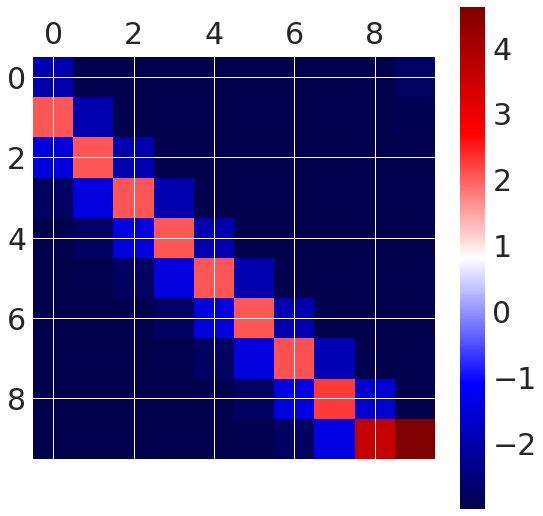

In [5]:
N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.020

training_time = 0.100
inter_sequence_time = 0.000
dt = 0.001
sequence1 = [0, 1, 2, 3]
sequence2 = [4, 5, 6, 7, 8, 9]
sequences = [sequence1, sequence2]

dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                    tau_z_post, tau_w, epochs=3, max_w=5.0, min_w=-3.0)

w = dic['w']
x_total = dic['x']
z_history = dic['z']
z_post_history = dic['z_post']

plt.matshow(w, cmap='seismic')
plt.colorbar();

Now the recall

In [14]:
G = 100.0
tau_m = 0.010
T = 2.0
I_cue = 0
T_cue = 0.050
dt = dt
threshold = 0.3

dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)

../network.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-G * x))


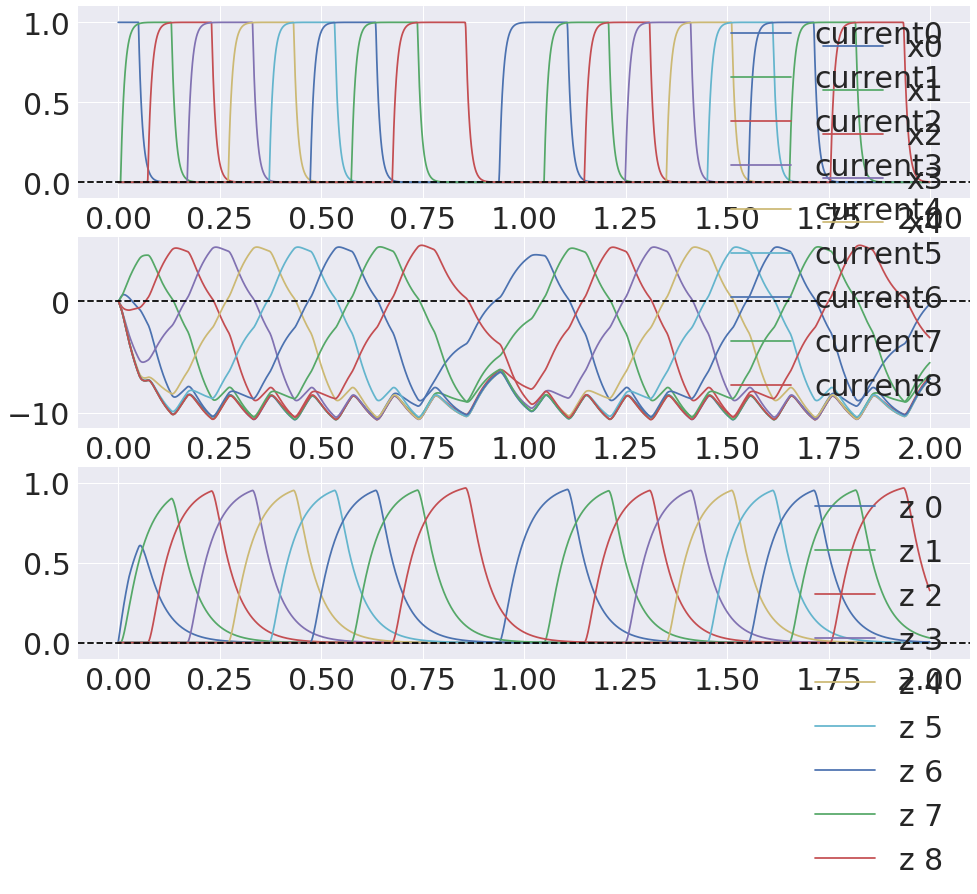

In [15]:
time = np.arange(0, T, dt)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# patterns = sequence
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
ax1.legend();
ax1.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();

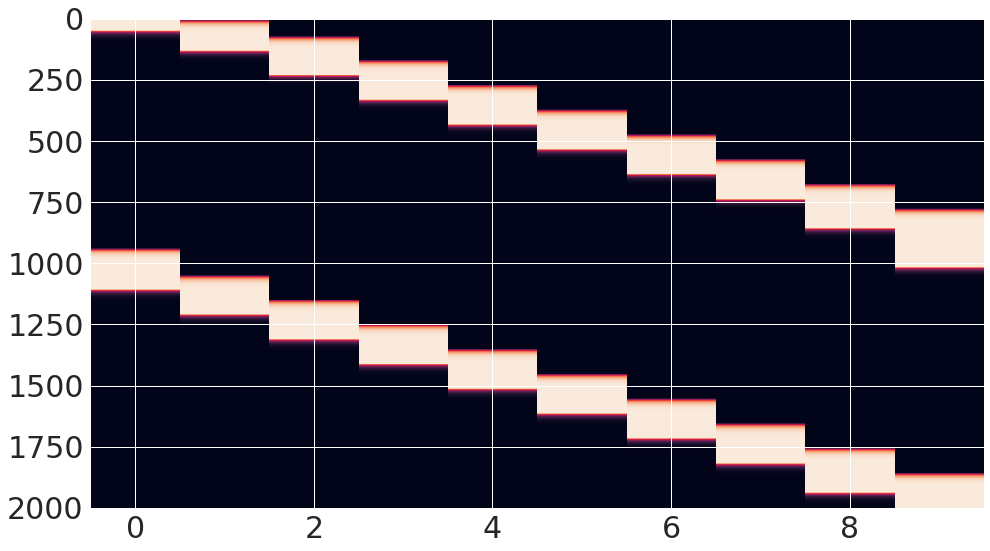

In [16]:
plt.imshow(x_history, aspect='auto')

## Let's disambiguate

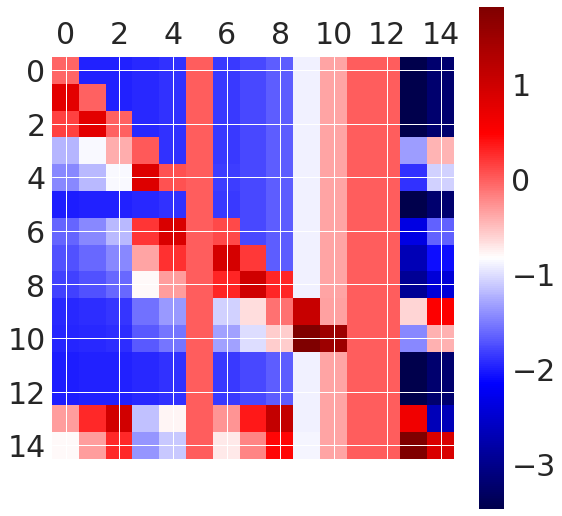

In [27]:
N = 15
tau_z = 0.250
tau_z_post = 0.005
tau_w = 0.050

training_time = 0.100
inter_sequence_time = 0.000
dt = 0.001
sequence1 = [0, 1, 2, 13, 14, 3, 4]
sequence2 = [6, 7, 8, 13, 14, 9, 10]
sequences = [sequence1, sequence2]

aux = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                    tau_z_post, tau_w, epochs=1, max_w=5.0, min_w=None)

w, x_total, z_history, z_post_history = aux

plt.matshow(w, cmap='seismic')
plt.colorbar();

In [30]:
G = 100.0
tau_m = 0.010
T = 2.0
I_cue = 0
T_cue = 0.050
dt = dt
threshold = 0.1

dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)

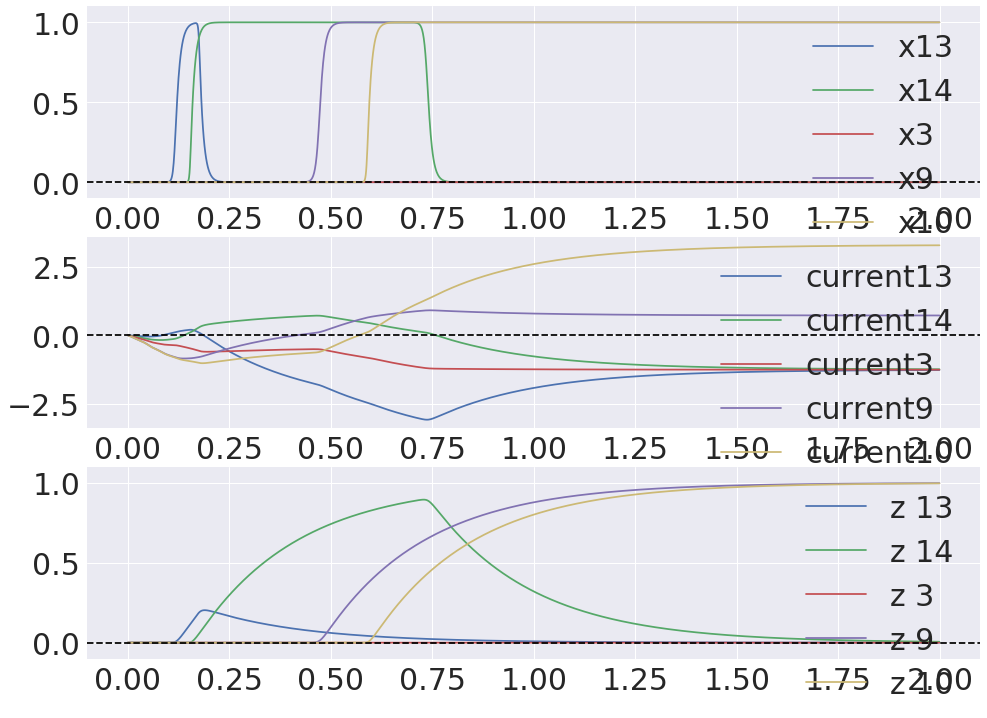

In [33]:
time = np.arange(0, T, dt)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = sequence1
patterns = [13, 14, 3, 9, 10]
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
ax1.legend();
ax1.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();